In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
%matplotlib inline

In [9]:
import random

In [2]:
df = pd.read_csv('/content/bioresponse.csv')
Y_data = df['Activity']
X_data = df.drop(columns = ['Activity'])
X_1 = X_data.to_numpy()
Y_1 = Y_data.to_numpy()

In [4]:
def sigmoid(z):
    s = 1./(1.+np.exp(-z))    
    return s


def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.    
    return w, b

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_1, Y_1, test_size=0.25)

In [24]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [27]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        #SGD correction
        k = random.sample(range(0, X_train.shape[1]), int(0.2 * X_train.shape[1]))
        grads, cost = propagate(w,b,X[:, k],Y[k])
        dw = grads["dw"]
        db = grads["db"]
        w -=learning_rate*dw
        b -=learning_rate*db
        if i % 1000 == 0:
            costs.append(cost)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [26]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [28]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [29]:
d = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = 40000, learning_rate = 0.4, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.542484
Cost after iteration 2000: 0.282261
Cost after iteration 3000: 0.255651
Cost after iteration 4000: 0.223693
Cost after iteration 5000: 0.213456
Cost after iteration 6000: 0.221298
Cost after iteration 7000: 0.192304
Cost after iteration 8000: 0.240688
Cost after iteration 9000: 0.194203
Cost after iteration 10000: 0.234436
Cost after iteration 11000: 0.231147
Cost after iteration 12000: 0.184220
Cost after iteration 13000: 0.212242
Cost after iteration 14000: 0.161245
Cost after iteration 15000: 0.177247
Cost after iteration 16000: 0.163594
Cost after iteration 17000: 0.209142
Cost after iteration 18000: 0.202561
Cost after iteration 19000: 0.178459
Cost after iteration 20000: 0.157191
Cost after iteration 21000: 0.170042
Cost after iteration 22000: 0.165266
Cost after iteration 23000: 0.158437
Cost after iteration 24000: 0.174570
Cost after iteration 25000: 0.176279
Cost after iteration 26000: 0.171665
Cost after ite

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Cost after iteration 32000: 0.165854
Cost after iteration 33000: nan
Cost after iteration 34000: 0.159467
Cost after iteration 35000: 0.181850
Cost after iteration 36000: 0.141161
Cost after iteration 37000: 0.156102
Cost after iteration 38000: 0.128333
Cost after iteration 39000: 0.121448
train accuracy: 85.92250266619267 %
test accuracy: 73.88059701492537 %


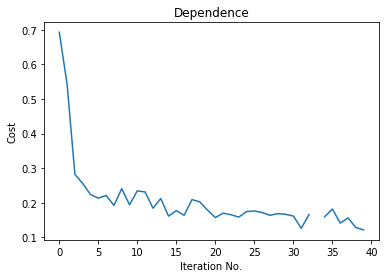

In [30]:
plt.plot(np.arange(d["num_iterations"]/1000),d["costs"])
plt.xlabel('Iteration No.')
plt.ylabel('Cost')
plt.title('Dependence')
plt.show()